In [23]:
import pandas as pd
import numpy as np
from sim import *
import matplotlib.pyplot as plt

In [17]:
import warnings
warnings.filterwarnings('ignore')

In [14]:
mimu = T20SimX(dir='upto2019\ArrandVersion.pkl')

In [10]:
S = pd.read_csv('dataset_prepped')
m=sorted(list(set(S[S.match_id > 1175355].match_id)))[:20]

In [21]:
pairs = []
for idx in m:
    X = S[S.innings == 1][S.match_id == idx]
    o_max = max(X.over)
    bowl = [list(X[X.over == o_].bowler)[0] for o_ in range(1, o_max + 1)]
    if len(bowl) < 20:
        bowl += ['M']*(20-len(bowl))
    b = pd.read_csv('IPL_Dataset/' + str(idx) + '_info.csv', skiprows=21, nrows=11, header=None)
    bat = list(b[3])

    a_runs = int(np.sum(list(map(int, X[X.batting_outcome != 'D'].batting_outcome))) + X.wides.sum() + X.noballs.sum() + X.fielding_extras.sum())

    s=[]
    for h in range(1000):
        s.append(mimu.sim_innings1('bB', bat, bowl, res='runs'))
    s_runs = np.median(s)

    pairs.append([a_runs, s_runs])


In [22]:
pairs

[[70, 176.0],
 [181, 171.0],
 [213, 172.0],
 [184, 164.0],
 [147, 174.0],
 [218, 169.0],
 [187, 172.0],
 [198, 161.0],
 [176, 165.0],
 [185, 159.0],
 [231, 161.0],
 [175, 172.0],
 [166, 164.0],
 [158, 172.0],
 [170, 183.0],
 [129, 156.0],
 [205, 176.0],
 [160, 165.0],
 [136, 157.0],
 [149, 176.0]]

Text(0, 0.5, 'Simulated Runs')

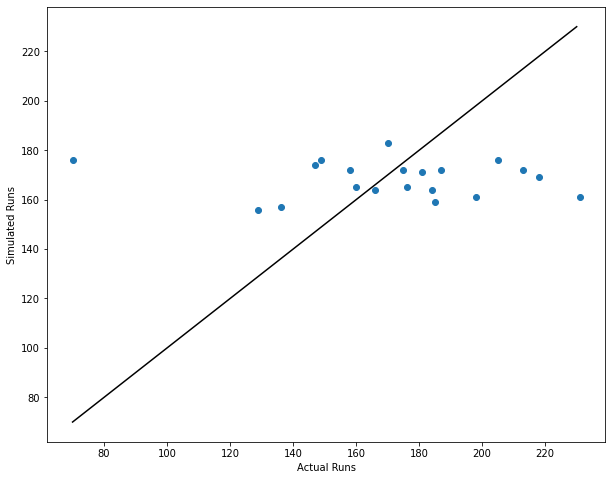

In [34]:
x,y = np.array(pairs).T
x_ = np.linspace(70, 230, 10)

fig, ax = plt.subplots(figsize=(10,8))
ax.scatter(x, y)
ax.plot(x_,x_,color='black')
plt.xlabel('Actual Runs')
plt.ylabel('Simulated Runs')

In [35]:
np.std(np.array(pairs)[:,0])

35.192186632830875